In [9]:
import time
import random
import itertools
import numpy as np
import pandas as pd
from scipy import *
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import mnist
from keras.utils import to_categorical

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
import networkx as nx

import keras

#%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split

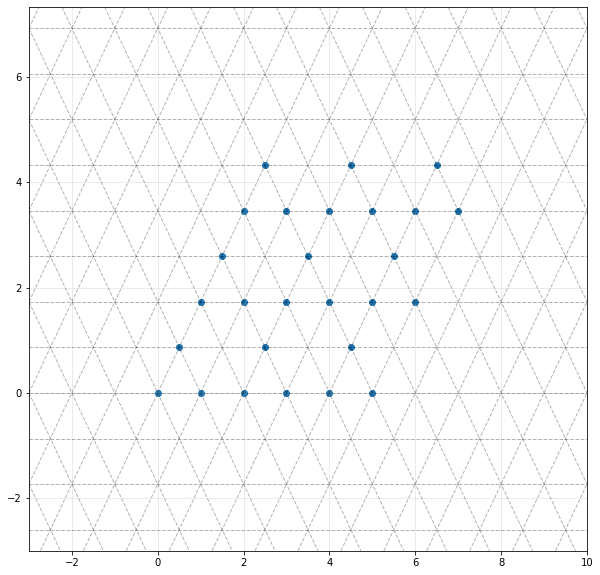

end
52
49


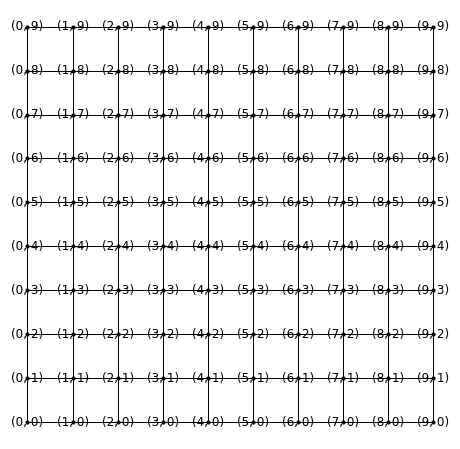

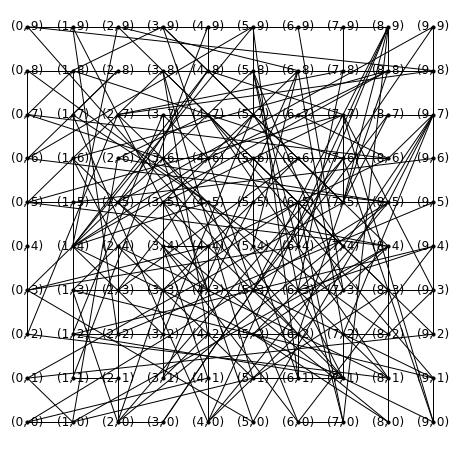

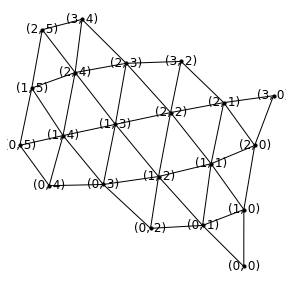

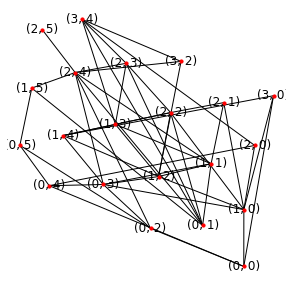

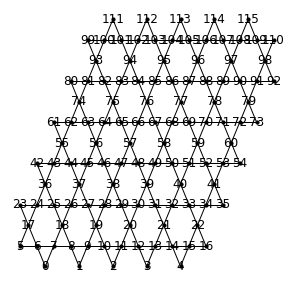

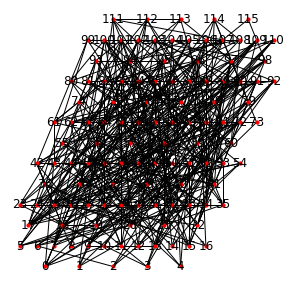

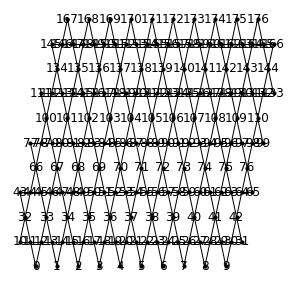

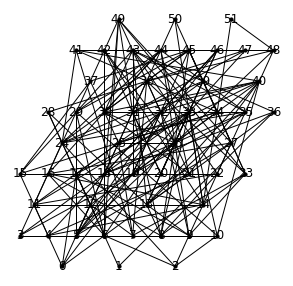

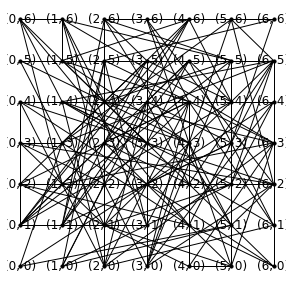

In [2]:
import ipynb.fs.full.Combined_Code as kg

# DATA CONSTRUCTOR

In [93]:

K = np.linspace(0,1,2000)
X0 = [];Y0 = []

option = "Kagome";n=1;m=1

for k in K:
    #print(np.round(k,4))
    
    G,pos = kg.Choose_Graph(option,n,m)
    #G = Rewire_Grid(option,G,p)
    G = kg.Add_Weights(G,k)
    
    matrix = nx.to_numpy_matrix(G)

    X0.append(matrix)
    
    graphs, weights, signed_matrices = kg.Create_Data([matrix])

    objs0,solve_time0 = kg.XOR_Model(graphs, weights, signed_matrices)

    Y0.append(objs0[0])


In [94]:
data = list(zip(X0,Y0))

np.random.shuffle(data)

X,Y=zip(*data)

## 2 part split

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(len(X_train),12,12,1)
X_test = X_test.reshape(len(X_test),12,12,1)
#X_val = X_val.reshape(len(X_val),12,12,1)

print(np.shape(X_train),np.shape(X_test))#,np.shape(X_val))
print(np.shape(Y_train),np.shape(Y_test))#,np.shape(Y_val))

(1400, 12, 12, 1) (600, 12, 12, 1)
(1400,) (600,)


## 3 part split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_test, X_val, Y_test, Y_val  = train_test_split(X_test, Y_test, test_size=0.5, random_state=1) 

print(np.shape(X_train),np.shape(X_test),np.shape(X_val))
print(np.shape(Y_train),np.shape(Y_test),np.shape(Y_val))

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_val = np.array(X_val)
Y_val= np.array(Y_val)

X_train = X_train.reshape(len(X_train),12,12,1)
X_test = X_test.reshape(len(X_test),12,12,1)
X_val = X_val.reshape(len(X_val),12,12,1)


(1400, 12, 12) (300, 12, 12) (300, 12, 12)
(1400,) (300,) (300,)


# NEURAL NETWORK

In [116]:
model = keras.models.Sequential()#add model layers
model.add(keras.layers.Conv2D(200, kernel_size=10, activation="relu", input_shape=(12,12,1)))
#model.add(keras.layers.Dropout(0.75))
#model.add(keras.layers.Conv2D(70, kernel_size=3, activation="relu"))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation="linear"))


model.summary()

opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss = "mean_squared_error", optimizer = "sgd")#,metrics=[soft_acc])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 3, 3, 200)         20200     
_________________________________________________________________
flatten_24 (Flatten)         (None, 1800)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 1801      
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________


# TRAINING

In [117]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)#,batch_size=10)

Epoch 1/100
44/44 [==============================] - 0s 4ms/step - loss: 4.6343 - val_loss: 1.5173
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1.2938 - val_loss: 1.5260
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 1.2338 - val_loss: 1.4364
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1315 - val_loss: 1.4265
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1101 - val_loss: 1.3990
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1122 - val_loss: 1.3796
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 1.0478 - val_loss: 1.3565
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1004 - val_loss: 1.3601
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 1.0511 - val_loss: 1.3290
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 1.0133 - val_loss: 1.3248
Epoch 11/

44/44 [==============================] - 0s 2ms/step - loss: 0.0614 - val_loss: 0.2052
Epoch 84/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0623 - val_loss: 0.2029
Epoch 85/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0500 - val_loss: 0.2168
Epoch 86/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.1929
Epoch 87/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1893
Epoch 88/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.1811
Epoch 89/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.1806
Epoch 90/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.1958
Epoch 91/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0414 - val_loss: 0.1789
Epoch 92/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.1658
Epoch 93/100


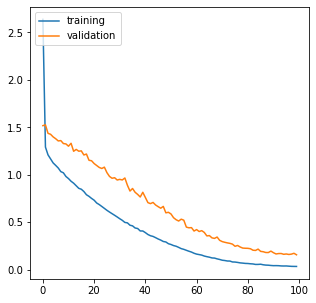

In [118]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot([i for i in range(len(history.history["loss"]))], history.history["loss"], label='training')
plt.plot([i for i in range(len(history.history["val_loss"]))], history.history["val_loss"], label='validation')
ax.legend(loc="upper left")

In [130]:
print(Y_train[0])
print(np.shape(X_train[0]))

pogodak=0
predictions = model.predict(X_train)
for pred,true in zip(predictions,Y_train):
    print(true, np.round(pred)[0])
    if(np.sqrt((true-np.round(pred)[0])**2)<0.5):
        pogodak+=1
        
print(pogodak/len(Y_train))

3.0
(12, 12, 1)
3.0 3.0
1.0 1.0
2.0 2.0
4.0 4.0
3.0 3.0
2.0 2.0
2.0 2.0
1.0 1.0
2.0 2.0
4.0 4.0
1.0 1.0
5.0 5.0
4.0 4.0
3.0 3.0
2.0 2.0
4.0 4.0
3.0 3.0
1.0 1.0
3.0 3.0
2.0 1.0
3.0 3.0
4.0 4.0
2.0 2.0
4.0 4.0
4.0 4.0
3.0 3.0
3.0 3.0
6.0 6.0
4.0 4.0
2.0 2.0
3.0 3.0
2.0 2.0
3.0 3.0
5.0 5.0
4.0 4.0
4.0 4.0
6.0 6.0
2.0 2.0
5.0 5.0
2.0 2.0
5.0 5.0
2.0 2.0
2.0 2.0
0.0 -0.0
2.0 2.0
1.0 1.0
3.0 3.0
3.0 3.0
0.0 -0.0
3.0 3.0
3.0 3.0
5.0 5.0
3.0 3.0
4.0 4.0
3.0 3.0
3.0 3.0
3.0 3.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
2.0 2.0
4.0 4.0
2.0 2.0
4.0 4.0
1.0 1.0
3.0 3.0
3.0 3.0
5.0 5.0
5.0 5.0
1.0 1.0
0.0 -0.0
5.0 5.0
3.0 3.0
1.0 1.0
1.0 1.0
3.0 3.0
4.0 4.0
3.0 3.0
0.0 0.0
2.0 2.0
2.0 2.0
5.0 5.0
3.0 3.0
0.0 -0.0
5.0 5.0
4.0 4.0
4.0 4.0
3.0 3.0
1.0 1.0
4.0 4.0
5.0 5.0
2.0 2.0
1.0 1.0
5.0 5.0
4.0 4.0
3.0 3.0
5.0 5.0
6.0 6.0
2.0 2.0
2.0 2.0
3.0 3.0
4.0 4.0
1.0 1.0
5.0 5.0
3.0 3.0
1.0 1.0
2.0 2.0
3.0 3.0
2.0 2.0
5.0 5.0
2.0 2.0
4.0 4.0
5.0 5.0
4.0 4.0
5.0 5.0
4.0 4.0
1.0 1.0
5.0 5.0
1.0 1.0
2.0 2.0
6.0 6.0
2.0 

In [131]:
print(Y_val[0])
print(np.shape(X_val[0]))

pogodak=0
predictions = model.predict(X_val)
for pred,true in zip(predictions,Y_val):
    print(true, np.round(pred)[0])
    if(np.sqrt((true-np.round(pred)[0])**2)<0.05):
        pogodak+=1
        
print(pogodak/len(Y_val))

5.0
(12, 12, 1)
5.0 5.0
1.0 1.0
1.0 2.0
1.0 1.0
3.0 2.0
4.0 4.0
4.0 4.0
1.0 2.0
1.0 1.0
3.0 3.0
6.0 6.0
3.0 3.0
5.0 5.0
4.0 4.0
3.0 3.0
1.0 2.0
2.0 2.0
5.0 5.0
2.0 2.0
6.0 5.0
5.0 5.0
6.0 6.0
4.0 4.0
5.0 4.0
4.0 4.0
2.0 2.0
1.0 1.0
4.0 4.0
2.0 2.0
4.0 4.0
5.0 5.0
1.0 1.0
4.0 3.0
3.0 3.0
2.0 2.0
3.0 3.0
5.0 5.0
2.0 2.0
4.0 4.0
4.0 4.0
4.0 3.0
1.0 2.0
1.0 1.0
1.0 1.0
2.0 2.0
3.0 3.0
4.0 4.0
4.0 3.0
2.0 2.0
5.0 5.0
5.0 5.0
3.0 3.0
3.0 3.0
4.0 4.0
3.0 3.0
3.0 3.0
3.0 3.0
4.0 4.0
1.0 1.0
5.0 5.0
2.0 2.0
4.0 4.0
4.0 4.0
1.0 2.0
1.0 1.0
2.0 2.0
1.0 2.0
2.0 2.0
4.0 4.0
4.0 4.0
4.0 4.0
2.0 2.0
5.0 5.0
0.0 -0.0
3.0 3.0
3.0 3.0
3.0 3.0
4.0 4.0
3.0 3.0
4.0 4.0
1.0 1.0
5.0 5.0
0.0 -0.0
1.0 1.0
1.0 1.0
3.0 3.0
2.0 2.0
3.0 3.0
1.0 2.0
5.0 4.0
4.0 3.0
4.0 4.0
2.0 2.0
6.0 6.0
1.0 1.0
3.0 3.0
4.0 4.0
4.0 4.0
3.0 4.0
5.0 5.0
3.0 3.0
5.0 5.0
3.0 3.0
2.0 3.0
1.0 1.0
3.0 3.0
0.0 1.0
3.0 3.0
5.0 4.0
1.0 1.0
5.0 5.0
2.0 2.0
5.0 5.0
1.0 1.0
6.0 6.0
3.0 3.0
2.0 2.0
4.0 4.0
2.0 3.0
3.0 3.0
2.0 3.0
3.0 3.0
5.0 4.